In [1]:
import json
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
def get_results(train=True):
    global filenames
    filenames = [f for f in os.listdir(os.getcwd()+'./results/') if not f.endswith('checkpoints')]
    filenames.extend([f for f in os.listdir(os.getcwd()+'./results_test/') if not f.endswith('checkpoints')\
                     and not f in filenames])
    for filename in sorted(filenames):
        if train:
            try:
                with open('./results/'+ filename,'r') as f: yield filename, json.load(f)
            except:
                continue
        else:
            try:
                with open('./results_test/'+ filename,'r') as f: yield filename, json.load(f)
            except:
                pass

In [3]:
def mk_dataframe(results_train, results_test=None):
    filename_train, results_train = results_train
    if results_test != None:
        filename_test, results_test = results_test
        assert filename_train==filename_test, 'filenames should be the same'
        results_train.update(results_test)
        print("Model: ", filename_test.strip('.json'))
        return pd.DataFrame.from_dict(results_train, orient='index').fillna('_')
    else:
        print("Model: ", filename_train.strip('.json'))
        return pd.DataFrame.from_dict(results_train, orient='index')

In [4]:
def show_plots(metric, idx):
    folder = 'losses/' if metric == 'loss' else 'accs/'
    filename = './plots/' + folder + os.listdir(os.getcwd() + './plots/' + folder)[idx]  
    print("Model: ", re.sub(r'./plots/' + folder, '', filename.replace('.png', '')))
    image = img.imread(filename)
    plt.clf()
    plt.figure(dpi=100)
    plt.imshow(image)
    plt.show()

In [5]:
results_train = get_results()
results_test = get_results(train=False)

In [6]:
mk_dataframe(next(iter(results_train)))

Model:  100d_bert_avg_types_homogeneous_kg


,max,agg,sel,where
dev,0.549228,0.902859,0.888862,0.661802
train,0.912307,0.996157,0.999392,0.914112


In [7]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_types_mixed_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.902022,0.937074,0.738366,0.642062,0.628066
test,_,0.900127,0.928372,0.732236,0.632426,0.614123
train,0.914255,0.996389,0.999553,0.917812,_,_


In [8]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.899151,0.867807,0.675679,0.556406,0.624357
test,_,0.898733,0.857441,0.669411,0.548322,0.620329
train,0.959639,0.987220,0.999106,0.972133,_,_


In [9]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_max-pool_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.899749,0.863979,0.671970,0.549946,0.620768
test,_,0.897467,0.848195,0.669981,0.546295,0.620899
train,0.957905,0.988989,0.998731,0.969631,_,_


In [10]:
mk_dataframe(next(iter(results_train)))

Model:  100d_types_homogeneous_kg


,max,agg,sel,where
dev,0.644181,0.901781,0.938955,0.753919
train,0.910335,0.994464,0.999326,0.913316


In [11]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.898456,0.922328,0.773515,0.663302,0.730879
test,_,0.897588,0.912578,0.768533,0.650501,0.719028
train,0.966001,0.986443,0.998669,0.978404,_,_


In [12]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_avg_types_homogeneous_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.899151,0.895442,0.682139,0.574351,0.644934
test,_,0.900950,0.883534,0.671374,0.559531,0.646232
train,0.915506,0.993458,0.999660,0.917061,_,_


In [13]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_avg_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.897356,0.885632,0.701759,0.588587,0.654504
test,_,0.895820,0.877074,0.701837,0.582394,0.653008
train,0.977567,0.986683,0.999214,0.989329,_,_


In [14]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_max-pool_types_mixed_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.900467,0.933724,0.734538,0.63644,0.650197
test,_,0.899747,0.927359,0.733312,0.631096,0.650728
train,0.912092,0.991170,0.999678,0.916275,_,_


In [15]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_max-pool_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.898911,0.891255,0.699844,0.585118,0.65582
test,_,0.901520,0.883471,0.702217,0.588157,0.657061
train,0.979605,0.988578,0.999446,0.990133,_,_


In [16]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_types_homogeneous_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.900119,0.939192,0.751306,0.650238,0.552138
test,_,0.901178,0.930402,0.748315,0.644265,0.542294
train,0.918036,0.996078,0.999503,0.914789,_,_


In [17]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.898694,0.929335,0.783017,0.672328,0.735036
test,_,0.899855,0.919065,0.780311,0.666373,0.733955
train,0.977766,0.993008,0.999201,0.982699,_,_


Model:  100d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

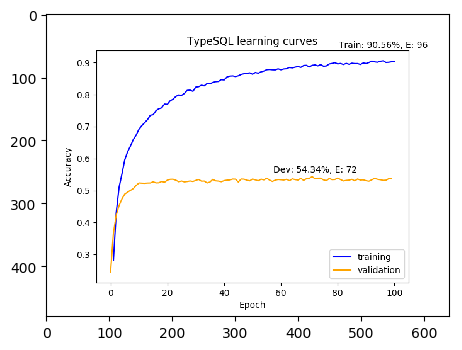

Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

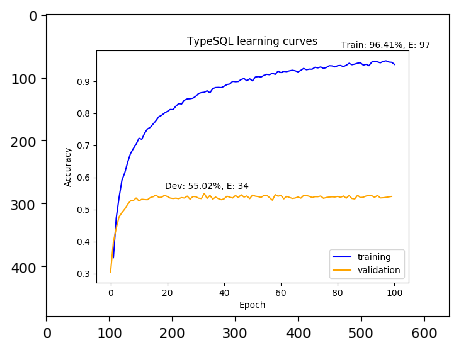

Model:  100d_bert_avg_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

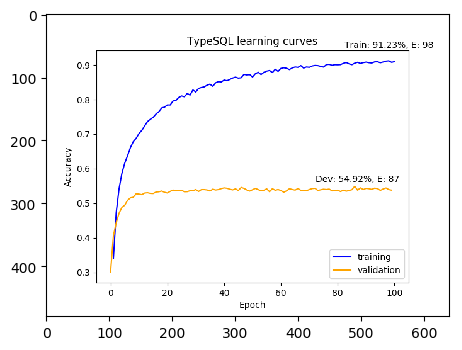

Model:  100d_bert_avg_types_mixed_kg


<Figure size 432x288 with 0 Axes>

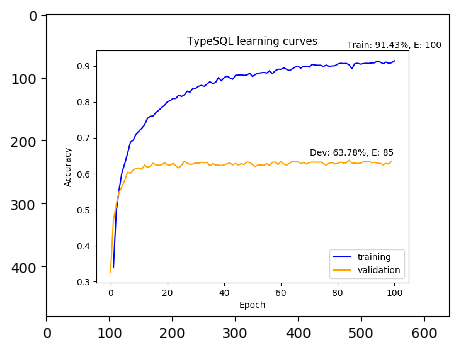

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

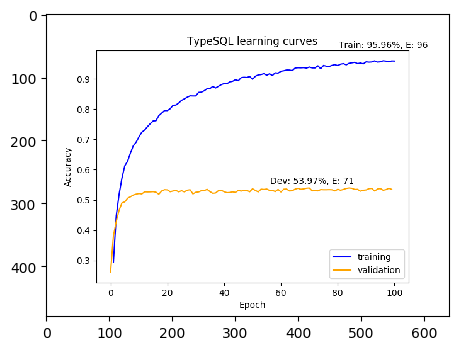

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

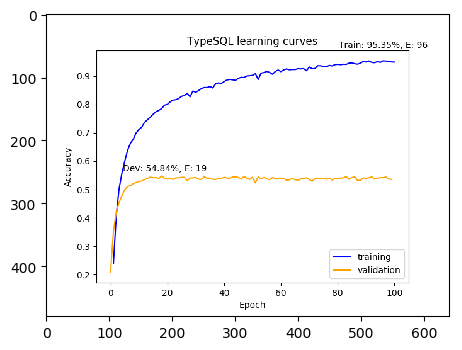

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

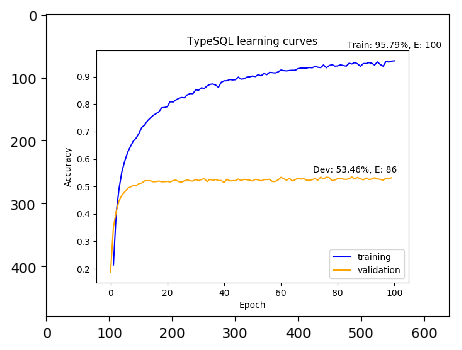

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

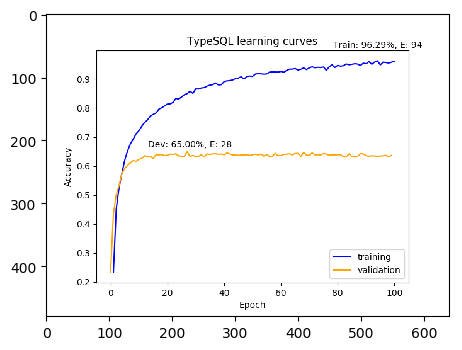

Model:  100d_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

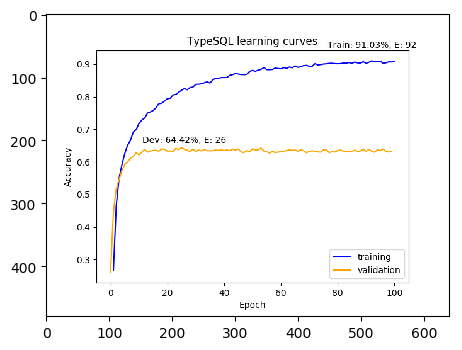

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

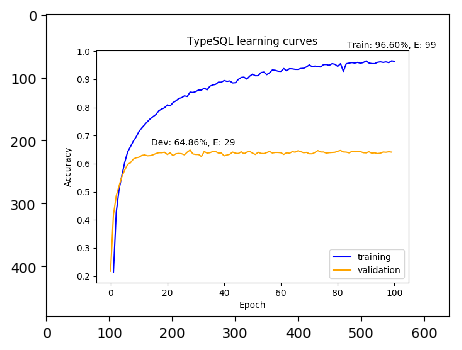

Model:  600d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

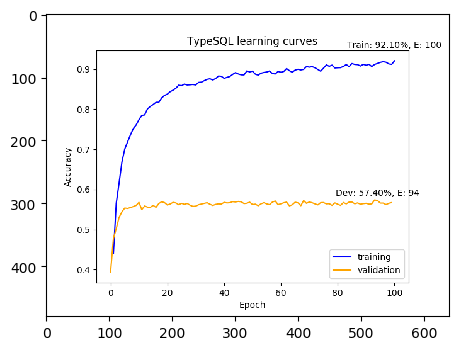

Model:  600d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

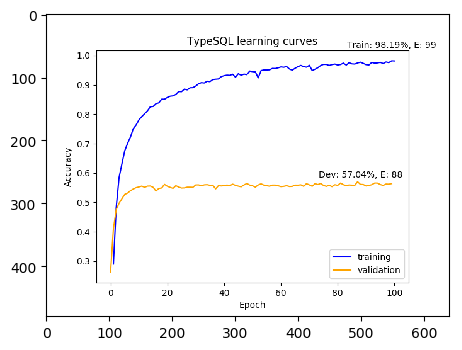

In [18]:
for i in range(len(filenames)):
    show_plots('acc', i)

Model:  100d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

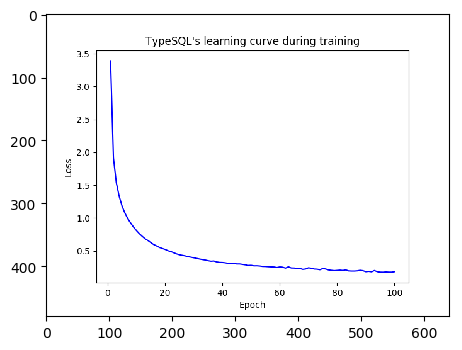

Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

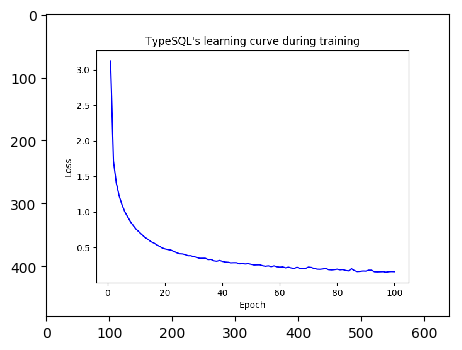

Model:  100d_bert_avg_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

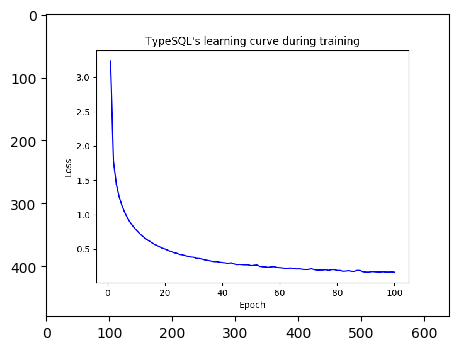

Model:  100d_bert_avg_types_mixed_kg


<Figure size 432x288 with 0 Axes>

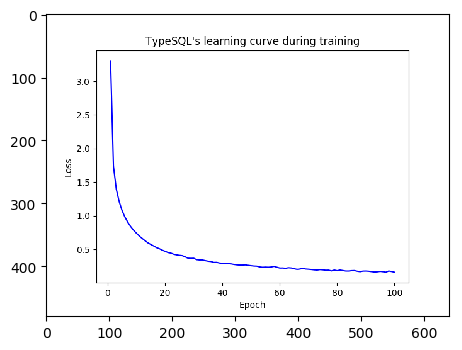

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

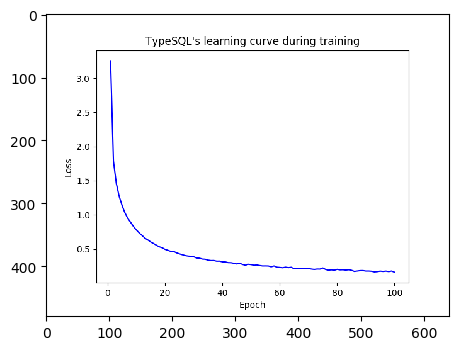

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

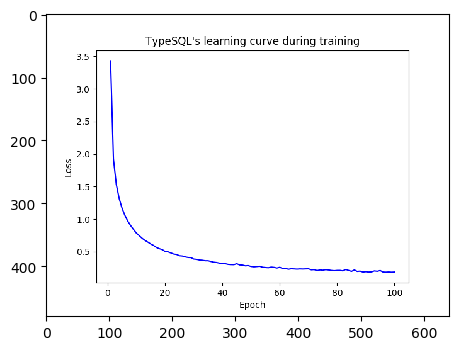

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

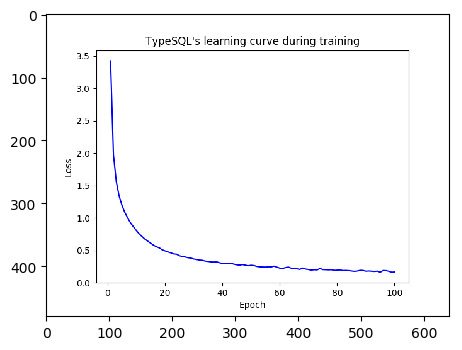

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

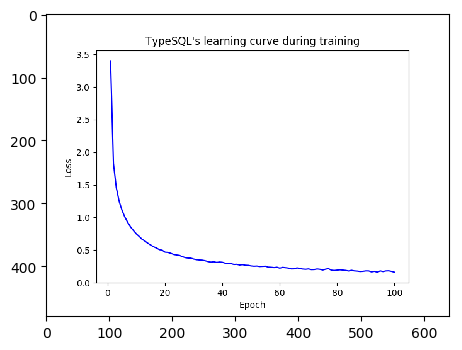

Model:  100d_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

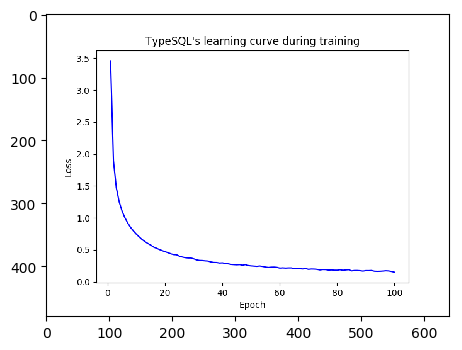

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

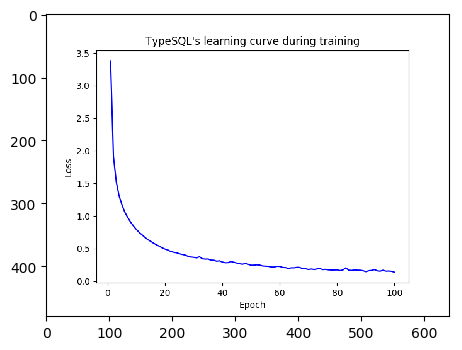

Model:  600d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

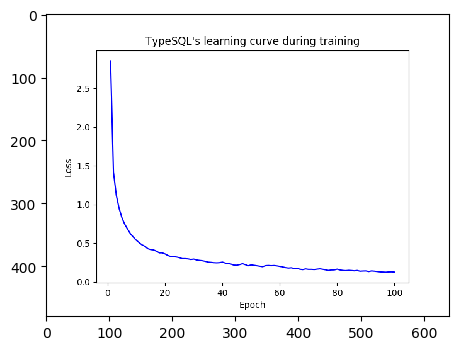

Model:  600d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

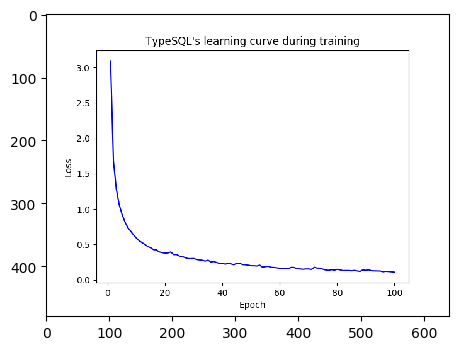

In [19]:
for i in range(len(filenames)):
    show_plots('loss', i)